<H1>Assignment for AI4PH: <br>COVID-19 among incarcerated individuals in Ontario Prisons in 2021 </H1>


My assignment uses data about incarcerated individuals in Ontario prisons who were tested for COVID-19. This data can be found at the following URL: <url>https://data.ontario.ca/dataset/covid-19-testing-of-inmates-in-ontario-s-correctional-institutions</url>

First, let's import the data from the CSV file, which is stored in the same directory.

In [169]:
import pandas as pd

filename = 'covid_Inmate_data.csv' #set the filename 
inmate_data = pd.read_csv(filename, sep = ",") #import the data, specifying commas as the delimiter
inmate_data.head() #print the first few values to confirm everything worked

,_id,Reported_Date,Region,Cumulative_Number_of_Tests_as_of_Reported_Date,Cumulative_Number_of_Positive_Tests_as_of_Reported_Date,Cumulative_Number_of_Negative_Tests_as_of_Reported_Date,Total_Number_of_Pending_Tests_on_Reported_Date,Total_Number_of_Unknown_Tests_on_Reported_Date,Total_Inmates_that_Refused_Swab_as_of_Reported_Date,Total_Inmates_on_Medical_Isolation_as_of_Reported_Date
0,1,2020-05-08T00:00:00,Central,330,153,140,30,7,NaN,222
1,2,2020-05-08T00:00:00,Eastern,84,1,76,7,0,NaN,63
2,3,2020-05-08T00:00:00,Northern,72,2,63,4,3,NaN,9
3,4,2020-05-08T00:00:00,Toronto,109,7,90,10,2,NaN,70
4,5,2020-05-08T00:00:00,Western,82,0,62,17,3,NaN,64


Although we have the data dictionary as a separate file, let's print out the columns in the inmate_data list:

In [171]:
inmate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   _id                                                      2030 non-null   int64  
 1   Reported_Date                                            2030 non-null   object 
 2   Region                                                   2030 non-null   object 
 3   Cumulative_Number_of_Tests_as_of_Reported_Date           2030 non-null   int64  
 4   Cumulative_Number_of_Positive_Tests_as_of_Reported_Date  2030 non-null   int64  
 5   Cumulative_Number_of_Negative_Tests_as_of_Reported_Date  2030 non-null   int64  
 6   Total_Number_of_Pending_Tests_on_Reported_Date           2030 non-null   int64  
 7   Total_Number_of_Unknown_Tests_on_Reported_Date           2030 non-null   int64  
 8   Total_Inmates_that_Refused_S

Looking at the above, we see that <i>Reported_Date</i> is an object, so let's change it to a proper date/time column

In [173]:
inmate_data['Reported_Date'] = pd.to_datetime(inmate_data['Reported_Date'])
inmate_data.head()

,_id,Reported_Date,Region,Cumulative_Number_of_Tests_as_of_Reported_Date,Cumulative_Number_of_Positive_Tests_as_of_Reported_Date,Cumulative_Number_of_Negative_Tests_as_of_Reported_Date,Total_Number_of_Pending_Tests_on_Reported_Date,Total_Number_of_Unknown_Tests_on_Reported_Date,Total_Inmates_that_Refused_Swab_as_of_Reported_Date,Total_Inmates_on_Medical_Isolation_as_of_Reported_Date
0,1,2020-05-08,Central,330,153,140,30,7,NaN,222
1,2,2020-05-08,Eastern,84,1,76,7,0,NaN,63
2,3,2020-05-08,Northern,72,2,63,4,3,NaN,9
3,4,2020-05-08,Toronto,109,7,90,10,2,NaN,70
4,5,2020-05-08,Western,82,0,62,17,3,NaN,64


The dates looks better now, but let's just look at one year's worth of data, say from Jan. 1 2021 to Jan. 1 2022:

In [175]:
inmate_data = inmate_data.loc[inmate_data['Reported_Date'] > '2021-01-01'] #sets lower bound date
inmate_data = inmate_data.loc[inmate_data['Reported_Date'] < '2022-01-01'] #sets upper bound date
inmate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 790 to 1989
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   _id                                                      1200 non-null   int64         
 1   Reported_Date                                            1200 non-null   datetime64[ns]
 2   Region                                                   1200 non-null   object        
 3   Cumulative_Number_of_Tests_as_of_Reported_Date           1200 non-null   int64         
 4   Cumulative_Number_of_Positive_Tests_as_of_Reported_Date  1200 non-null   int64         
 5   Cumulative_Number_of_Negative_Tests_as_of_Reported_Date  1200 non-null   int64         
 6   Total_Number_of_Pending_Tests_on_Reported_Date           1200 non-null   int64         
 7   Total_Number_of_Unknown_Tests_on_Reported_Date        

 The dates are filtered, but there is some extra data that we probably won't use, like pending or unknown tests. 
 Let's now get rid of this data:

In [177]:
inmate_data = inmate_data.drop(columns=['Total_Number_of_Pending_Tests_on_Reported_Date']) 
inmate_data = inmate_data.drop(columns=['Total_Number_of_Unknown_Tests_on_Reported_Date']) 
inmate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 790 to 1989
Data columns (total 8 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   _id                                                      1200 non-null   int64         
 1   Reported_Date                                            1200 non-null   datetime64[ns]
 2   Region                                                   1200 non-null   object        
 3   Cumulative_Number_of_Tests_as_of_Reported_Date           1200 non-null   int64         
 4   Cumulative_Number_of_Positive_Tests_as_of_Reported_Date  1200 non-null   int64         
 5   Cumulative_Number_of_Negative_Tests_as_of_Reported_Date  1200 non-null   int64         
 6   Total_Inmates_that_Refused_Swab_as_of_Reported_Date      1200 non-null   float64       
 7   Total_Inmates_on_Medical_Isolation_as_of_Reported_Date 

Now, let's calculate the overall <b>positivity rate</b> by dividing the cumulative number of positive tests by the culumlative number of tests (i.e., the positive results by the total) and save this to a new column

In [179]:
inmate_data['Positivity_Rate'] = inmate_data['Cumulative_Number_of_Positive_Tests_as_of_Reported_Date'] / inmate_data['Cumulative_Number_of_Tests_as_of_Reported_Date']
inmate_data.info()
inmate_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 790 to 1989
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   _id                                                      1200 non-null   int64         
 1   Reported_Date                                            1200 non-null   datetime64[ns]
 2   Region                                                   1200 non-null   object        
 3   Cumulative_Number_of_Tests_as_of_Reported_Date           1200 non-null   int64         
 4   Cumulative_Number_of_Positive_Tests_as_of_Reported_Date  1200 non-null   int64         
 5   Cumulative_Number_of_Negative_Tests_as_of_Reported_Date  1200 non-null   int64         
 6   Total_Inmates_that_Refused_Swab_as_of_Reported_Date      1200 non-null   float64       
 7   Total_Inmates_on_Medical_Isolation_as_of_Reported_Date 

,_id,Reported_Date,Region,Cumulative_Number_of_Tests_as_of_Reported_Date,Cumulative_Number_of_Positive_Tests_as_of_Reported_Date,Cumulative_Number_of_Negative_Tests_as_of_Reported_Date,Total_Inmates_that_Refused_Swab_as_of_Reported_Date,Total_Inmates_on_Medical_Isolation_as_of_Reported_Date,Positivity_Rate
790,791,2021-01-03,Central,4737,192,4434,720.0,18,0.040532
791,792,2021-01-03,Eastern,4397,10,4313,845.0,67,0.002274
792,793,2021-01-03,Northern,2505,8,2413,553.0,10,0.003194
793,794,2021-01-03,Toronto,2204,119,2050,2080.0,92,0.053993
794,795,2021-01-03,Western,3356,30,3197,873.0,175,0.008939


Looks good, but let's check that the positivity rate makes sense:

In [181]:
inmate_data['Positivity_Rate'].describe()

count    1200.000000
mean        0.041046
std         0.020436
min         0.002254
25%         0.029339
50%         0.036977
75%         0.054784
max         0.170745
Name: Positivity_Rate, dtype: float64

That data looks OK, so let's restrict it for a single region (Toronto):

<Axes: title={'center': 'Positivity Rate among incarcerated persons (2021), Toronto Region'}, ylabel='Positivity rate'>

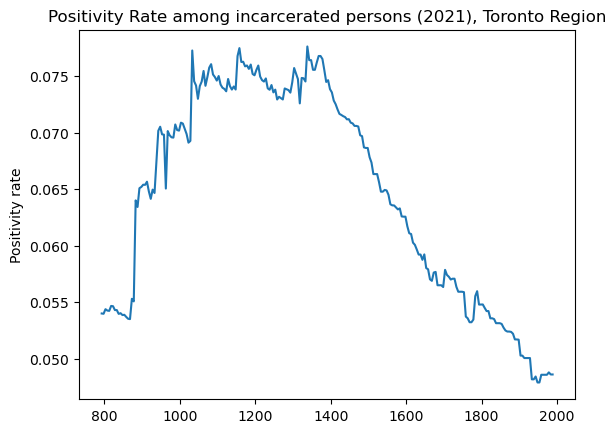

In [183]:
import matplotlib.pyplot as plt

inmate_data_TO = inmate_data.loc[inmate_data['Region'] == 'Toronto'] #populate the list with inmate data from Toronto

inmate_data_TO['Positivity_Rate'].plot(title='Positivity Rate among incarcerated persons (2021), Toronto Region', ylabel='Positivity rate') #plot this data on a bar chart

Not bad, but the dates on the x-axis are really weird. Let's try grouping by month and see if it looks better:


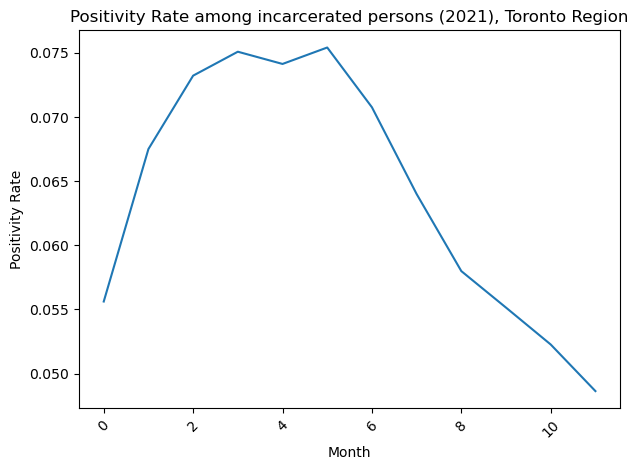

In [185]:
inmate_data_TO = inmate_data_TO.set_index('Reported_Date')
monthly_inmate_data_TO = inmate_data_TO.resample('ME')['Positivity_Rate'].mean()
monthly_inmate_data_TO = monthly_inmate_data_TO.reset_index()

plt.plot(monthly_inmate_data_TO['Positivity_Rate'])
plt.xlabel('Month')
plt.ylabel('Positivity Rate')
plt.title('Positivity Rate among incarcerated persons (2021), Toronto Region')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Improves plot layout
plt.show()


That's much easier to read! But does the positivity rate for Toronto's prison population match up when compared to rates elsewhere in Ontario?

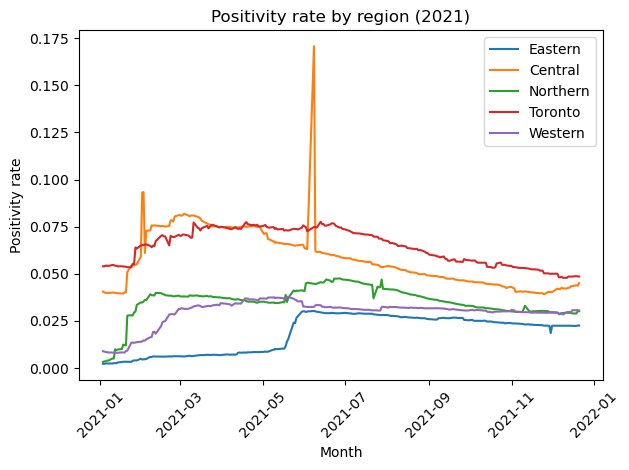

In [187]:
#Set the index for the entire dataset as the date, then calculate the monthly positivity rate for all data
inmate_data = inmate_data.set_index('Reported_Date')
monthly_inmate_data = inmate_data.resample('ME')['Positivity_Rate'].mean()
monthly_inmate_data = monthly_inmate_data.reset_index()
inmate_data = inmate_data.reset_index()

#define the 5 regions covered by the data
ON_Regions = ['Eastern', 'Central', 'Northern', 'Toronto', 'Western'] #Regions from .info()

#loop through each region and pick up the plot data for each
for region in ON_Regions:
    region_data = inmate_data.loc[(inmate_data['Region'] == region) & (inmate_data['Reported_Date'] > '2021-01-01') & (inmate_data['Reported_Date'] < '2022-12-31')]
    plt.plot(region_data['Reported_Date'], region_data['Positivity_Rate'], label=region)

#format the chart and display it 
plt.xlabel('Month')
plt.ylabel('Positivity rate')
plt.title('Positivity rate by region (2021)')
plt.legend()
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Improves plot layout
plt.show()
    



This chart seems to suggest that the positivity rate among Toronto's incarcerated population was generally higher than for the other regions in Ontario, with the exception of the Central region in early 2021. 

There are two other interesting sets of data that might be related: <i>the total number of inmates who refused a COVID-19 swab test</i> and <i>the number of inmates in medical isolation</i>. One hypothesis might be that a rise in the number of inmates who refused a swab test could then lead to a rise in the number of inmates in medical isolation, as COVID-19 wouldn't be detected until the symptoms were so severe that they would need to be isolated. 


Let's look at both for a single region (Toronto) to see if there's an obvious relationship. (...as we still have the data for Toronto separated)

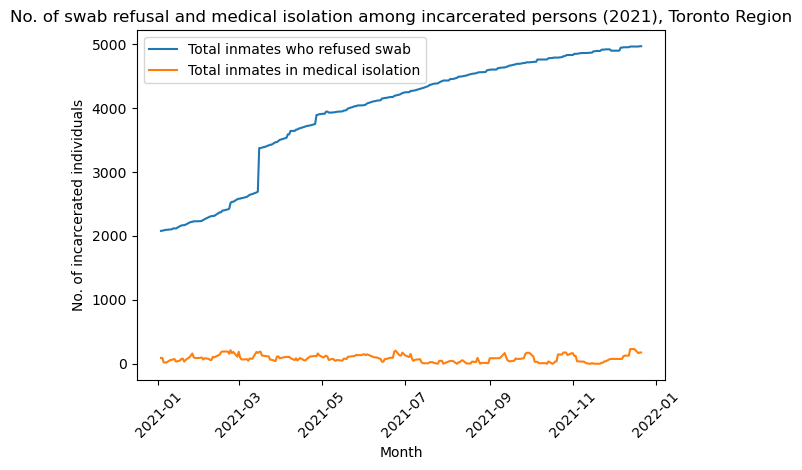

In [191]:
import matplotlib.pyplot as plt


plt.plot(inmate_data_TO['Total_Inmates_that_Refused_Swab_as_of_Reported_Date'], label='Total inmates who refused swab')
plt.plot(inmate_data_TO['Total_Inmates_on_Medical_Isolation_as_of_Reported_Date'], label='Total inmates in medical isolation')
plt.xlabel('Month')
plt.ylabel('No. of incarcerated individuals')
plt.title('No. of swab refusal and medical isolation among incarcerated persons (2021), Toronto Region')
plt.legend()
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Improves plot layout
plt.show()

So there doesn't look like there might be much to look at here, but the sudden rise in refusals around March is interesting. Did this happen across Ontario?

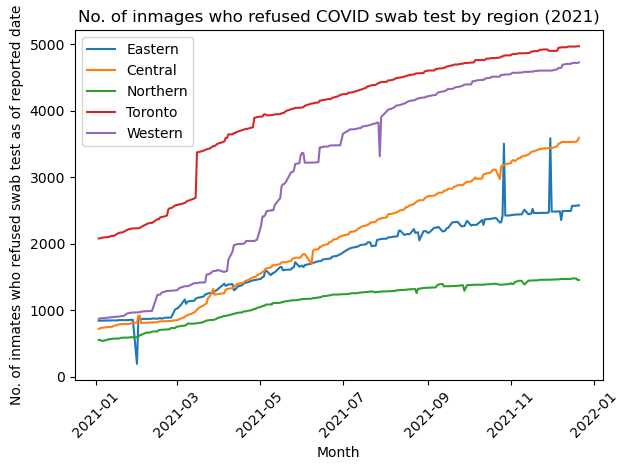

In [193]:
#Set the index for the entire dataset as the date, then calculate the monthly positivity rate for all data
inmate_data = inmate_data.set_index('Reported_Date')
monthly_inmate_data = inmate_data.resample('ME')['Total_Inmates_that_Refused_Swab_as_of_Reported_Date'].mean()
monthly_inmate_data = monthly_inmate_data.reset_index()
inmate_data = inmate_data.reset_index()

#define the 5 regions covered by the data
ON_Regions = ['Eastern', 'Central', 'Northern', 'Toronto', 'Western'] #Regions from .info()

#loop through each region and pick up the plot data for each
for region in ON_Regions:
    region_data = inmate_data.loc[(inmate_data['Region'] == region) & (inmate_data['Reported_Date'] > '2021-01-01') & (inmate_data['Reported_Date'] < '2022-12-31')]
    plt.plot(region_data['Reported_Date'], region_data['Total_Inmates_that_Refused_Swab_as_of_Reported_Date'], label=region)

#format the chart and display it 
plt.xlabel('Month')
plt.ylabel('No. of inmates who refused swab test as of reported date')
plt.title('No. of inmages who refused COVID swab test by region (2021)')
plt.legend()
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Improves plot layout
plt.show()

This suggests that something happened around February-March 2021 that caused the number of COVID-19 refusals to jump substantially, especially among inmates in the Toronto and Western regions.<br><br>NOTE: <i>There seems to be issues with data quality for the Eastern and Western regions, but I didn't have enough time to correct these. While I'm noting it here for the sake of transparency, it doesn't really affect the overall trends. </i>

Although the data does not specifically show why COVID-19 swab tests were refused by inmates, a search of publications and news articles sheds some light on some factors that might have contributed to this rise, such as: 
- hesitancy to testing due to potential for forced medicalvisolation of COVID-infected individuals, which would have removed them from their friends and other support networks
- concerted, collective action among inmates to protest a lack of COVID mitigations, such as PPE or masks
- general distrust of prison personnel, including healthcare workers
- a perception that inmates were less likely to contract COVID-19 due to restrictions on movement and vistation

Sources: 
- Evans, J., & House, J. (2024). “A prison is no place for a pandemic”: Canadian prisoners’ collective action in the time of COVID-19. Punishment & Society, 26(1), 168-186. https://doi.org/10.1177/14624745231194276
- Ortiz-Paredes, D., Varsaneux, O., Worthington, J., Park, H., MacDonald, S. E., Basta, N. E., Lebouché, B., Cox, J., Ismail, S. J., & Kronfli, N. (2022). <i>Reasons for COVID-19 vaccine refusal among people incarcerated in Canadian federal prisons.</i> PloS one, 17(3), e0264145. https://doi.org/10.1371/journal.pone.0264145-
- Pyrooz, D., Ricciardelli, R., Bucerius, S. <i>Jails and Prisons Remain a Hotbed for COVID-19—Vaccinate the People who Live or Work in Them.</i> RSC COVID-19 Series, no. 111. URL: https://rsc-src.ca/en/voices/jails-and-prisons-remain-hotbed-for-covid-19%E2%80%94vaccinate-people-who-live-or-work-in-them
